In [59]:
import collections
from datetime import datetime
from IPython.display import clear_output, display, HTML
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from pathlib import Path
import pickle
import scipy
# import seaborn as sns
import sklearn
from sklearn.decomposition import PCA
import sys
from scipy.ndimage import gaussian_filter1d
import imageio
from IPython.display import HTML
import pytoolsAL as ptAL
mpl.rcParams['pdf.fonttype'] = 42

import sys
sys.path.append("C:/Users/nadia/Documents/GitHub/steinmetzlab/wf + opto/figure-making")
from wfOpto import *

In [60]:
#work
plt.style.use(r'C:\Users\nadia\Documents\GitHub\steinmetzlab\ALpres.mplstyle')

In [61]:
#personal
# plt.style.use(r'C:\GitHub\steinmetzlab\ALpres.mplstyle')

In [62]:
data = wfOpto(Path(r'Y:\Subjects\AL_0033\2025-01-07\1'))

In [63]:
name='AL33'
date='01-07'

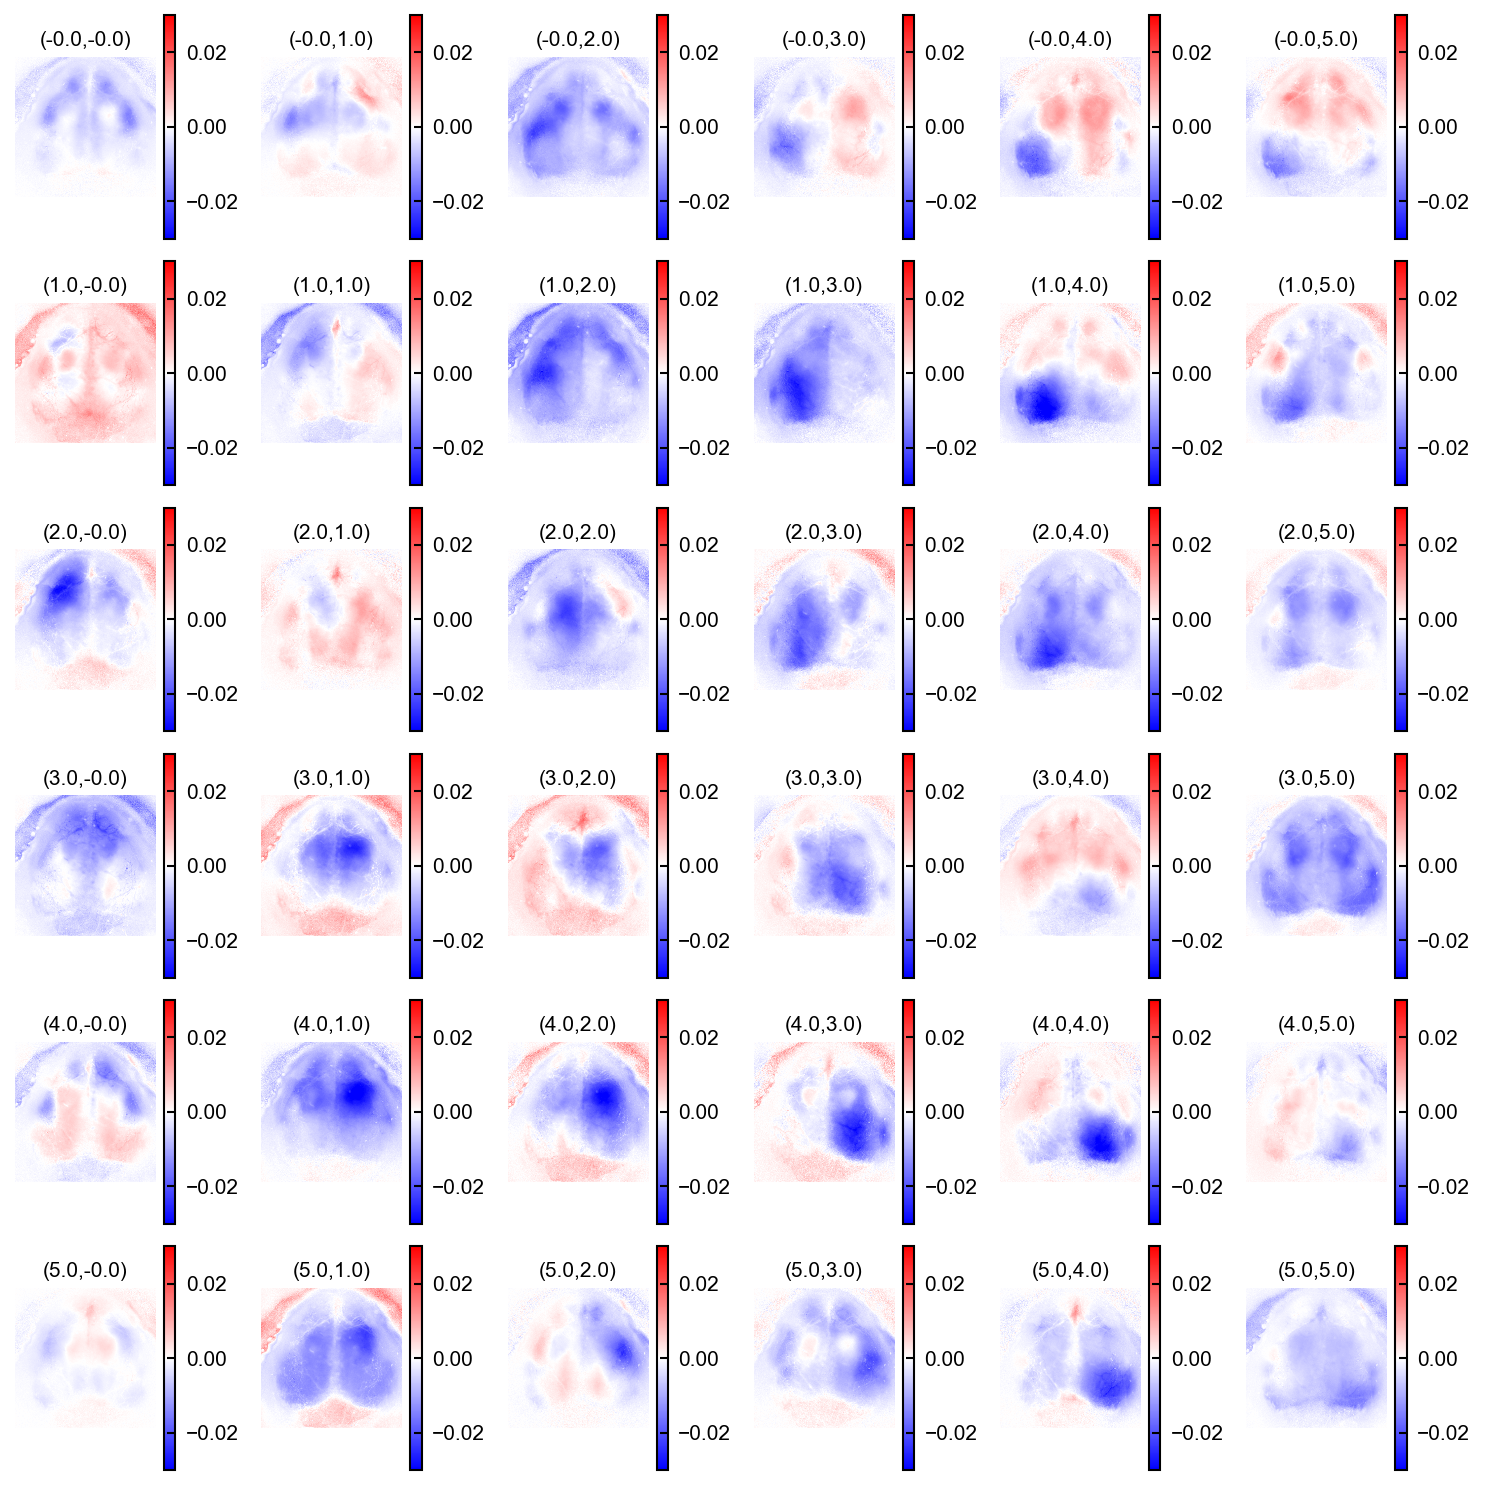

In [67]:
sparseIms=[]
start=0
end=0.2
n_samples = int((end-start)*35)
pow = np.argwhere(data.laserPowers==1.5).ravel()
for galvoX in np.unique(data.galvoX):
    for galvoY in np.unique(data.galvoY):
        galvoXTr = np.argwhere(data.galvoX == galvoX).ravel()
        galvoYTr = np.argwhere(data.galvoY == galvoY).ravel()
        loc = np.intersect1d(galvoXTr,galvoYTr)
        theseTrs = np.intersect1d(pow,loc)
        onTimes = data.laserOn[theseTrs]
        trs = [np.linspace(start+on, end+on, n_samples) for on in onTimes]

        wf = np.mean(data.tToWFManual(trs),axis=0)
        mov = data.svdSpat @ wf.T #add back in spatial -- this now gives us F(t)
        timemean = np.mean(mov,axis=1)
        mov_re = mov.reshape(560,560,-1)
        meanimg = data.meanImage.reshape(560*560)
        mov_mean_dff = timemean/meanimg
        sparseIms.append(mov_mean_dff.reshape(560,560))

f = plt.figure(figsize=(10,10))
galvolenx = len(np.unique(data.galvoX))
galvoleny = len(np.unique(data.galvoY))
gs = mpl.gridspec.GridSpec(galvolenx,galvoleny)

clim = np.percentile(np.concatenate(sparseIms),[1,99])
for i,im in enumerate(sparseIms):
    ax = f.add_subplot(gs[i])
    im = ax.imshow(im,cmap='bwr',clim=clim,vmin=-0.03,vmax=0.03)
    plt.title(f'({np.unique(data.galvoX)[i//galvoleny]},{np.unique(data.galvoY)[i%galvoleny]})')
    f.colorbar(im,ax=ax)
    ax.axis('off')
f.savefig(f'{name}_sparseIms_{date}.png',bbox_inches='tight')

In [66]:
f.savefig(f'{name}_sparseIms_{date}.png',bbox_inches='tight')